In [1]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
iris = fetch_ucirepo(id=53) 
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
# metadata 
print(iris.metadata) 
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [3]:
# Check for different key names
column_names = iris.variables.get('names', iris.variables.get('feature_names', iris.variables.get('column_names')))
# Create DataFrame
ds = pd.DataFrame(iris.data.features, columns=column_names)
ds['target'] = iris.data.targets
# Print the DataFrame
print(ds)

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
ds.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target'], dtype='object')

In [6]:
ds.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

In [7]:
ds.duplicated().sum()

3

In [8]:
ds.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [9]:
ds.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
ds.shape

(150, 5)

In [11]:
ds.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
ds['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

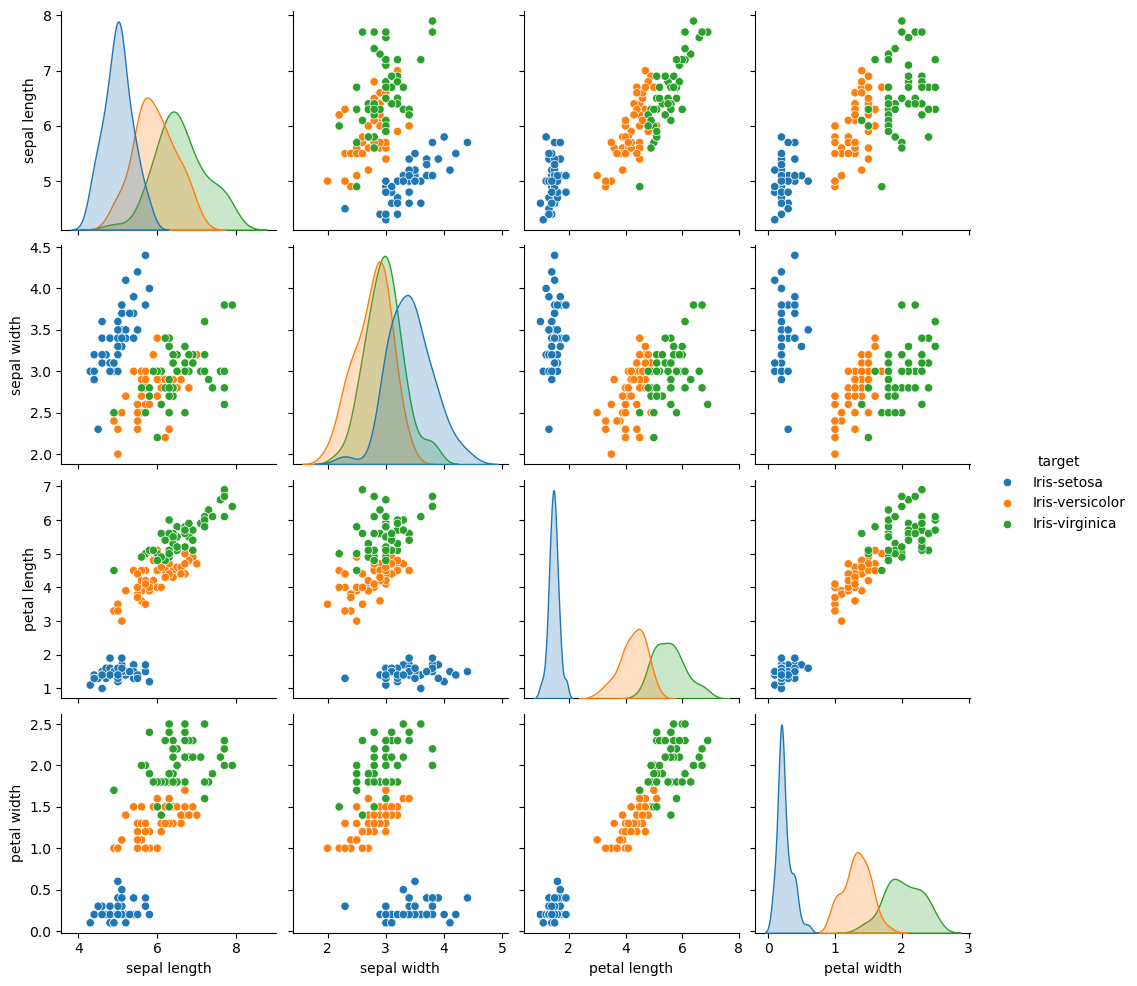

In [13]:
sns.pairplot(ds,hue="target")

<Axes: xlabel='sepal width', ylabel='petal width'>

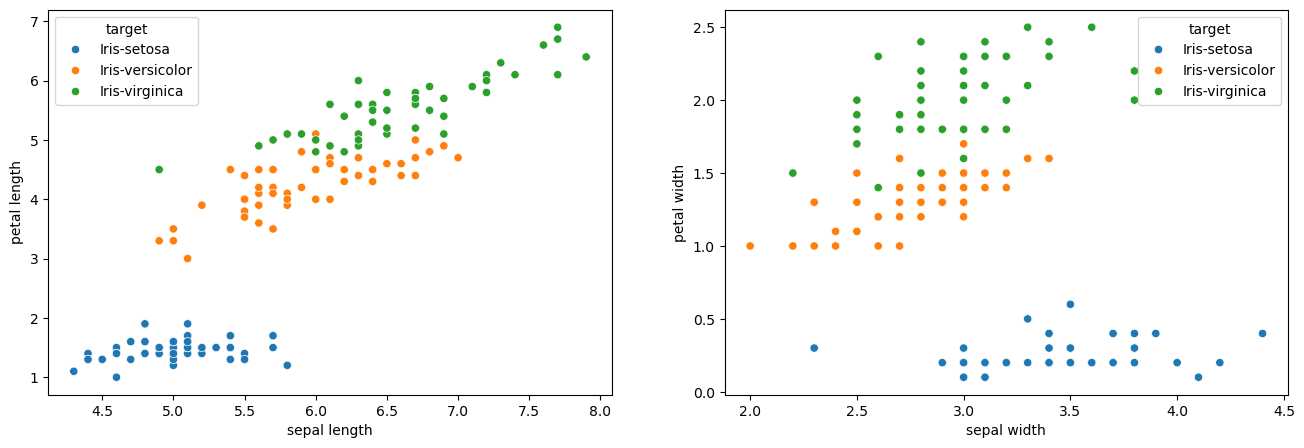

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='sepal length',y='petal length',data=ds,hue='target',ax=ax1)
sns.scatterplot(x='sepal width',y='petal width',data=ds,hue='target',ax=ax2)

<Axes: ylabel='petal length'>

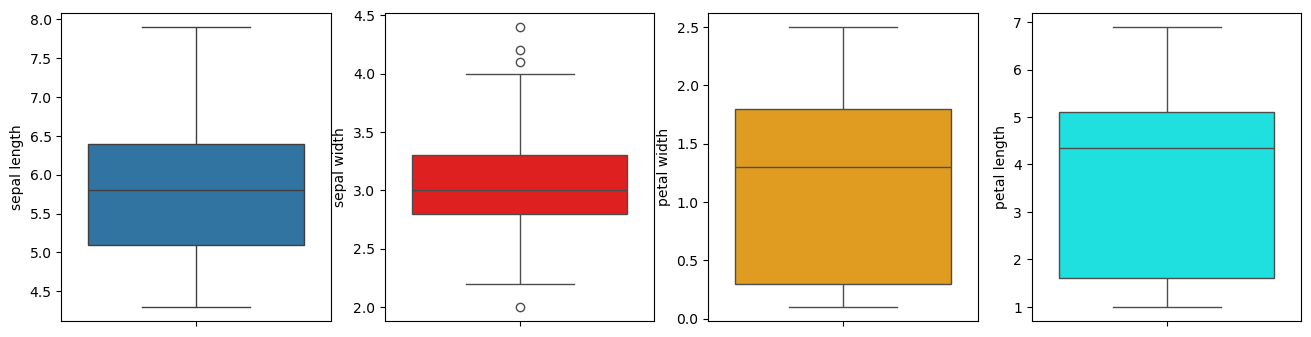

In [15]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=ds,y='sepal length')
plt.subplot(1,4,2)
sns.boxplot(data=ds,y='sepal width',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=ds,y='petal width',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=ds,y='petal length',color='cyan')

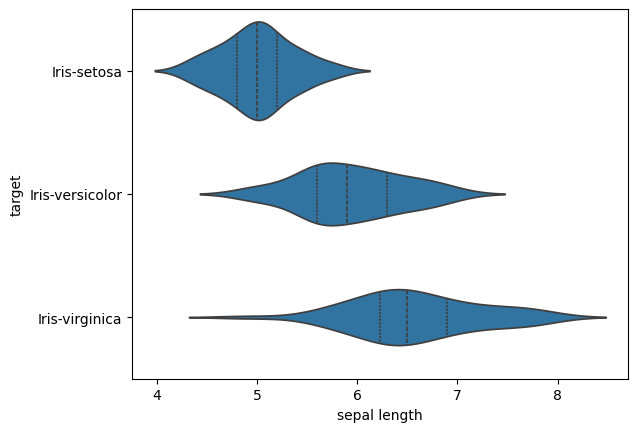

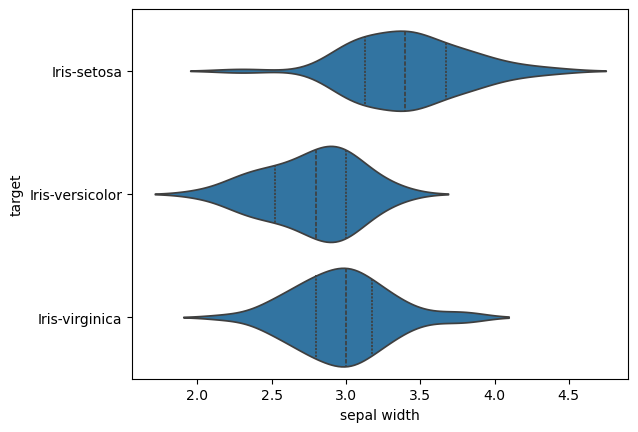

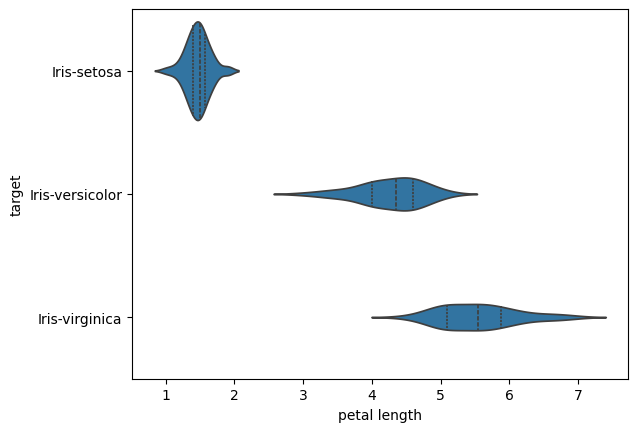

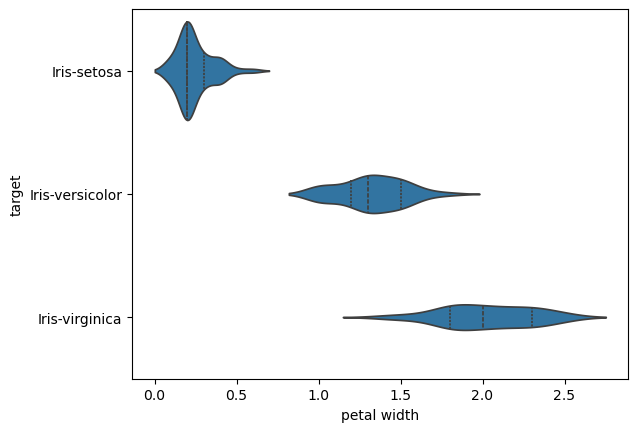

In [16]:
sns.violinplot(y='target', x='sepal length', data=ds, inner='quartile')
plt.show()
sns.violinplot(y='target', x='sepal width', data=ds, inner='quartile')
plt.show()
sns.violinplot(y='target', x='petal length', data=ds, inner='quartile')
plt.show()
sns.violinplot(y='target', x='petal width', data=ds, inner='quartile')
plt.show()

In [18]:
# Assuming 'species' is the column with non-numeric values
ds['target'] = pd.factorize(ds['target'])[0]

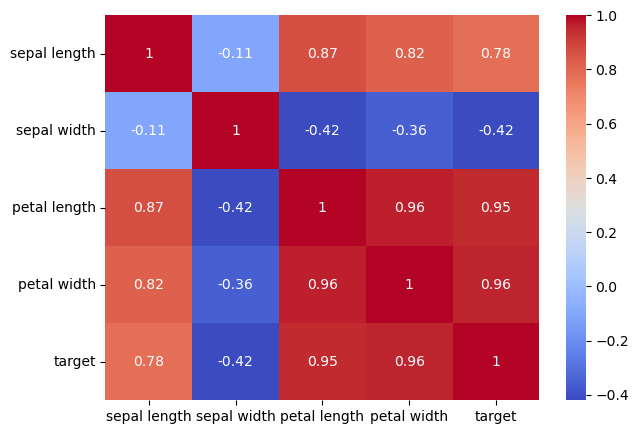

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(ds.corr(), annot=True,cmap='coolwarm')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
ds['target'] = le.fit_transfotrm = (ds['target'])
ds.head(10)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [23]:
from sklearn.model_selection import train_test_split
X = ds.drop(columns=['target'])
Y = ds['target']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

In [24]:
# Initialize a Logistic Regression
lg= LogisticRegression(max_iter=1000)

In [25]:
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Predict on the test set and calculate accuracy
y_pred=lg.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [29]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))

In [30]:
print('Logistic Regression')
report(lg)
print(f'Accuracy: {round(score*100,2)}%')

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%


In [31]:
# Initialize a Linear SVC
rbf_sv= SVC()
rbf_sv.fit(x_train,y_train)
L_svc=LinearSVC()
L_svc.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [32]:
# Predict on the test set and calculate accuracy
y_pred=L_svc.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [33]:
print('Linear SVC')
report(L_svc)
print(f'Accuracy: {round(score*100,2)}%')

Linear SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%


In [34]:
DTC = DecisionTreeClassifier()

In [35]:
DTC=DTC.fit(x_train,y_train)

In [37]:
# Predict on the test set and calculate accuracy
y_pred=DTC.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [38]:
print('Decision Tree Classifier')
report(DTC)
print(f'Accuracy: {round(score*100,2)}%')

Decision Tree Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%


In [39]:
NB= MultinomialNB()

In [40]:
NB.fit(x_train,y_train)

MultinomialNB()

In [41]:
# Predict on the test set and calculate accuracy
y_pred=NB.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [42]:
print('NB')
report(NB)
print(f'Accuracy: {round(score*100,2)}%')

NB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.75      1.00      0.86        12
           2       1.00      0.78      0.88        18

    accuracy                           0.91        45
   macro avg       0.92      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45

Accuracy: 91.11%


In [43]:
KNN=KNeighborsClassifier(n_neighbors=6)

In [44]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [45]:
KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=6)

In [46]:
y_pred=KNN.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [47]:
print('KNN')
report(KNN)
print(f'Accuracy: {round(score*100,2)}%')

KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%
